In [3]:

%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
pd.options.display.mpl_style = 'default'

import inspect, os
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
os.sys.path.insert(0,parentdir) 
from src.dashboard_helpers import Test, custom_amount_stats
from src.data_retrieval import *
from db_utils import query_hive_ssh
import copy


def doctor_payment_data(t, n_clicks, conversion_rate, average_donation, banner_name, method_name ):
    t = copy.deepcopy(t)
    donations = int(n_clicks * conversion_rate)
    clicks = t.data[banner_name]['clicks']
    clicks = clicks.reset_index()
    del clicks['timestamp']
    gw = pd.DataFrame([[0, method_name]]*n_clicks )
    gw.columns = ['impressions_seen', 'payment_method']
    t.data[banner_name]['clicks'] = pd.concat([clicks, gw], axis=0)

    dons = t.data[banner_name]['donations']
    dons = dons.reset_index()
    del dons['timestamp']
    gw = pd.DataFrame([[average_donation, 0, method_name]]*donations )
    gw.columns = ['amount', 'impressions_seen', 'payment_method']
    t.data[banner_name]['donations'] = pd.concat([dons, gw], axis=0)
    return t

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [6]:
start = '2015-04-10 12:00'
end =  '2015-06-05 18:00'   
ctl1 = 'B15_0605_enUS_mob_pm_ctl_and'
ctl2 = 'B15_0605_enUS_mob_pm_ctl_ios'
ctl3 = 'B15_0410_enUS_mob_pm_ctl'
gib1 = 'B15_0605_enUS_mob_pm_gib_and'
gib2 = 'B15_0605_enUS_mob_pm_gib_ios'
gib3 = 'B15_0410_enUS_mob_pm_gib'

In [7]:
t = Test(ctl1, ctl2, ctl3, gib1, gib2, gib3, start=start, stop = end)

In [8]:
ctl = 'ctl'
t.combine([ctl1, ctl2, ctl3], 'ctl')
gib = 'gib'
t.combine([gib1, gib2, gib3], 'gib')

In [9]:
t.ecom(ctl, gib)

,donations,impressions,dons/i,amount,amount/i,clicks,clicks/i,dons/clicks,amount_ro,amount_ro/i,max,median,avg,avg_ro
ctl,2139,1145400,0.001867,19883.73,0.017360,4178,0.003648,0.511967,18033.73,0.015744,500,3,9.295806,8.482469
gib,2060,1159500,0.001777,18462.94,0.015923,3985,0.003437,0.516939,17062.94,0.014716,100,3,8.962592,8.339658


In [11]:
t.get_payment_method_details(ctl, gib)

donations  clicks  conversion_rate  percent clicked on  \
ctl amazon        639    1019        62.708538           24.389660   
    cc            380    1148        33.101045           27.477262   
    paypal       1120    2011        55.693685           48.133078   
gib amazon        537     846        63.475177           21.229611   
    cc            418    1167        35.818338           29.284818   
    paypal       1105    1972        56.034483           49.485571   

            percent donated on  total_amount  ave_amount_ro  
ctl amazon           29.873773       5532.00       8.370487  
    cc               17.765311       4580.50      10.643048  
    paypal           52.360916       9771.23       7.821731  
gib amazon           26.067961       4204.00       7.828678  
    cc               20.291262       5126.00      10.332518  
    paypal           53.640777       9132.94       7.848127

In [14]:
# Doctor the Click and Donation Counts
clicks = 67 + 15 + 196 # data taken from other Google Wallet Notebooks
conversion_rate = 0.58
average_donation = 6.8
t2 = doctor_payment_data(t, clicks, conversion_rate, average_donation, gib, 'gw' )
t2.get_payment_method_details(ctl, gib)

donations  clicks  conversion_rate  percent clicked on  \
ctl amazon        639    1019        62.708538           24.389660   
    cc            380    1148        33.101045           27.477262   
    paypal       1120    2011        55.693685           48.133078   
gib amazon        537     846        63.475177           19.845179   
    cc            418    1167        35.818338           27.375088   
    gw            161     278        57.913669            6.521229   
    paypal       1105    1972        56.034483           46.258503   

            percent donated on  total_amount  ave_amount_ro  
ctl amazon           29.873773       5532.00       8.370487  
    cc               17.765311       4580.50      10.643048  
    paypal           52.360916       9771.23       7.821731  
gib amazon           24.178298       4204.00       7.828678  
    cc               18.820351       5126.00      10.332518  
    gw                7.248987       1094.80            NaN  
    paypal           49.752364       9132.94       7.848127

#Clicks per Impression

,P(Winner),Winners Lift,CI
gib,0.64398,"(0.00%, 0.00%)","(0.003568, 0.003789)"
ctl,0.35602,"(-3.40%, 5.21%)","(0.003539, 0.003760)"


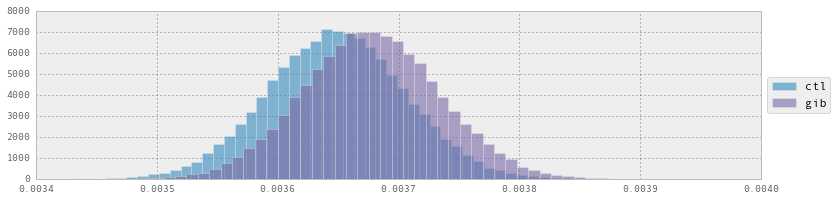

In [15]:
t2.rate_stats(gib, ctl, rate = 'clicks/impressions', conf = 95)

#Donations per Impression

,P(Winner),Winners Lift,CI
gib,0.80358,"(0.00%, 0.00%)","(0.001838, 0.001997)"
ctl,0.19642,"(-3.30%, 8.89%)","(0.001789, 0.001948)"


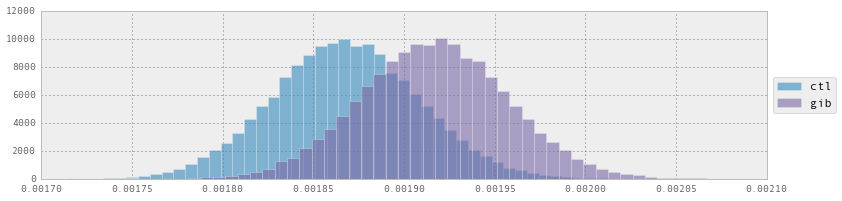

In [16]:
t2.rate_stats(gib, ctl, rate = 'donations/impressions', conf = 95)

# Amount Per Impression

Counter({3.0: 1276, 15.0: 412, 20.0: 208, 6.0: 165, 10.0: 44, 5.0: 42, 50.0: 42, 100.0: 14, 1.0: 9, 25.0: 3, 7.0: 2, 8.0: 2, 2.0: 1, 4.0: 1})


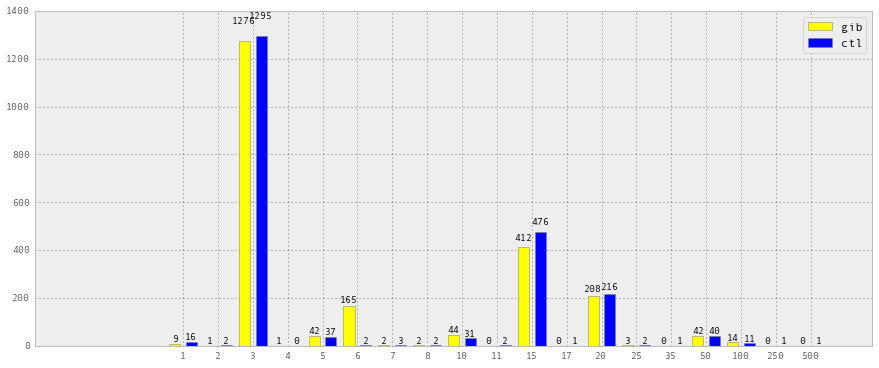

In [17]:
t2.compare_donation_amounts(gib, ctl )

Values for banner  gib : [3.0, 15.0, 20.0, 6.7999999999999998, 10.0, 50.0, 5.0]
Values for banner  ctl : [3.0, 15.0, 20.0, 50.0, 5.0, 10.0]


,P(Winner),Winners Lift,CI
ctl,0.52214,"(0.00%, 0.00%)","(0.014736, 0.016644)"
gib,0.47786,"(-7.96%, 9.13%)","(0.014717, 0.016582)"


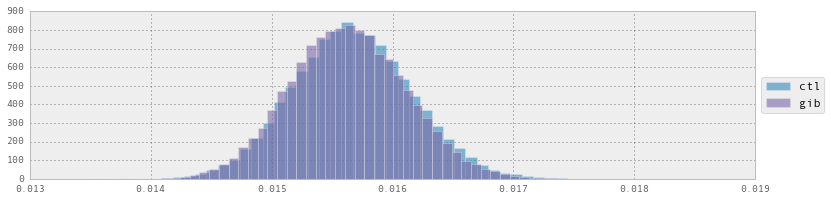

In [18]:
values = {
ctl: 6,
gib: 7
}

t2.amount_stats( values, conf = 95, rate = 'donations/impressions')